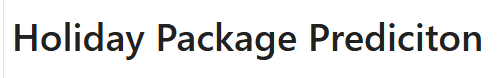

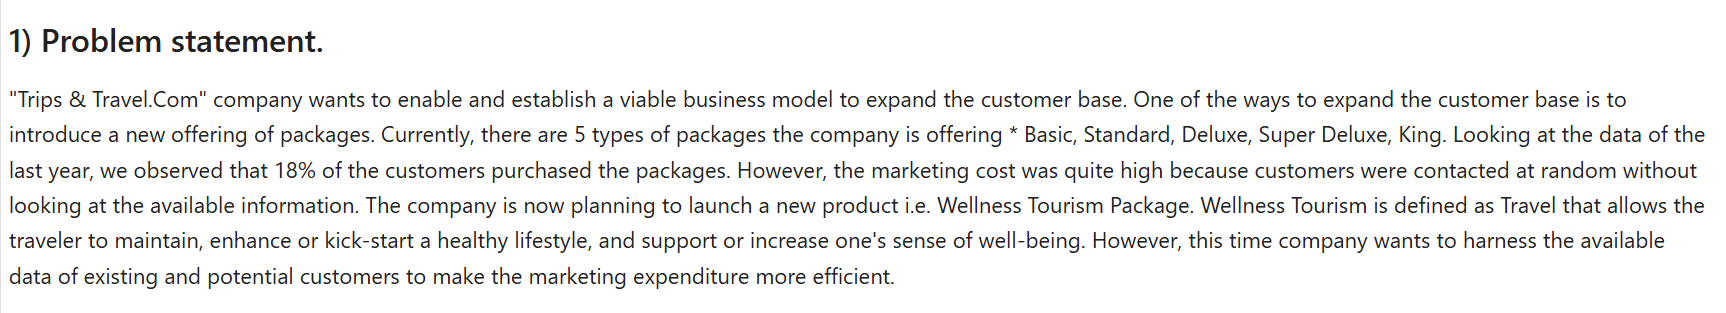

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
df = pd.read_csv(r"C:\Users\ASUS\machne learning\Random forest\Travel.csv")

In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [11]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


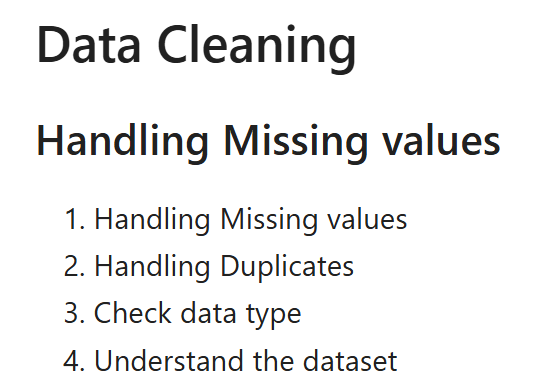

In [15]:
df[df.isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [22]:
df.select_dtypes(include = ['object'])

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive
...,...,...,...,...,...,...
4883,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager
4884,Company Invited,Salaried,Male,Basic,Single,Executive
4885,Self Enquiry,Salaried,Female,Standard,Married,Senior Manager
4886,Self Enquiry,Small Business,Male,Basic,Single,Executive


In [23]:
df.select_dtypes(include = ['object']).columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [25]:
object_dtype_cols_list = df.select_dtypes(include = ['object']).columns
object_dtype_cols_list

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [27]:
for col in object_dtype_cols_list:
    print(df[col].value_counts())
    print("\n")
    

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64


Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64


Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64


ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64


MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64


Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64




In [142]:
df['Gender'] = df['Gender'].replace(to_replace='Fe Male', value='Female')
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [143]:
df['MaritalStatus'] = df['MaritalStatus'].replace(to_replace='Single', value='Unmarried')
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [42]:
df['DurationOfPitch'].isnull().sum()

251

In [43]:
df['DurationOfPitch'].isnull().sum() > 0

True

In [46]:
features_with_null_values = [feature for feature in df.columns if df[feature].isnull().sum() > 0] 
features_with_null_values

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [53]:
#find the percentage of missing values with respect to those columns
print("MISSING VALUES %: \n")
for feature in features_with_null_values:
    print(feature, np.round(df[feature].isnull().mean() * 100 ,2),"%")

MISSING VALUES %: 

Age 4.62 %
TypeofContact 0.51 %
DurationOfPitch 5.14 %
NumberOfFollowups 0.92 %
PreferredPropertyStar 0.53 %
NumberOfTrips 2.86 %
NumberOfChildrenVisiting 1.35 %
MonthlyIncome 4.77 %


In [58]:
df[features_with_null_values].select_dtypes(include=['object'])

,TypeofContact
0,Self Enquiry
1,Company Invited
2,Self Enquiry
3,Company Invited
4,Self Enquiry
...,...
4883,Self Enquiry
4884,Company Invited
4885,Self Enquiry
4886,Self Enquiry


In [55]:
df[features_with_null_values].select_dtypes(exclude=['object'])

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,41.0,6.0,3.0,3.0,1.0,0.0,20993.0
1,49.0,14.0,4.0,4.0,2.0,2.0,20130.0
2,37.0,8.0,4.0,3.0,7.0,0.0,17090.0
3,33.0,9.0,3.0,3.0,2.0,1.0,17909.0
4,NaN,8.0,3.0,4.0,1.0,0.0,18468.0
...,...,...,...,...,...,...,...
4883,49.0,9.0,5.0,4.0,2.0,1.0,26576.0
4884,28.0,31.0,5.0,3.0,3.0,2.0,21212.0
4885,52.0,17.0,4.0,4.0,7.0,3.0,31820.0
4886,19.0,16.0,4.0,3.0,3.0,2.0,20289.0


In [57]:
df[features_with_null_values].select_dtypes(exclude=['object']).describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [60]:
numeric_na_columns = df[features_with_null_values].select_dtypes(exclude=['object']).columns
numeric_na_columns

Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [62]:
for feature in numeric_na_columns:
    print(df[feature].value_counts(), "\n")

Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: count, dtype: int64 

DurationOfPitch
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
29.0      74
32.0      74
25.0      73
21.0      73
27.0      72
26.0      72
24.0      70
35.0      66
20.0      65
28.0      61
33.0      57
19.0      57
34.0      50
36.0      44
5.0        6
126.0   

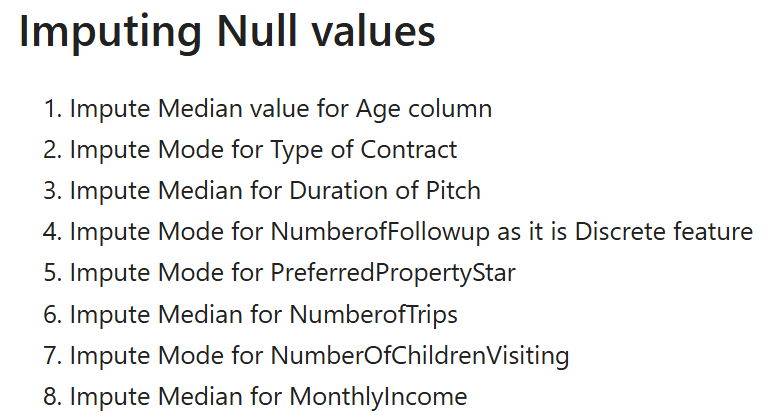

In [63]:
df.NumberOfFollowups.mode()

0    4.0
Name: NumberOfFollowups, dtype: float64

In [64]:
df.NumberOfFollowups.mode()[0]

4.0

In [67]:
numeric_na_columns

Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

## replace nan value of continuous feature with median

In [144]:
#continuous features

#Age
df['Age'].fillna(df['Age'].median(), inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#MonthlyIncome
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

#'NumberOfTrips'
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace=True)

## replace nan value of discrete and category features with mode

In [145]:
#discrete features

#NumberOfFollowups
df['NumberOfFollowups'].fillna(4.0 , inplace=True)

#'PreferredPropertyStar'
df['PreferredPropertyStar'].fillna(3.0, inplace=True)

#'NumberOfChildrenVisiting'
df['NumberOfChildrenVisiting'].fillna(1.0, inplace=True)

In [87]:
df.TypeofContact.mode()

0    Self Enquiry
Name: TypeofContact, dtype: object

In [90]:
df.NumberOfFollowups.mode()

0    4.0
Name: NumberOfFollowups, dtype: float64

In [93]:
df.PreferredPropertyStar.mode()

0    3.0
Name: PreferredPropertyStar, dtype: float64

In [94]:
df.NumberOfChildrenVisiting.mode()

0    1.0
Name: NumberOfChildrenVisiting, dtype: float64

In [146]:
# category features
df.TypeofContact.fillna('Self Enquiry', inplace=True)

In [147]:
df.head()
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [148]:
df_backup = df.copy()
df_backup.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [166]:
df_backup.to_csv("C:\\Users\\ASUS\\machne learning\\Random forest\\cleaned_data.csv", index=False)

In [149]:
df.drop('CustomerID', inplace=True, axis=1)

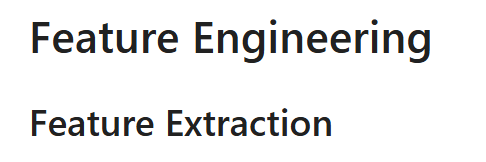

In [150]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df['TotalVisiting']

0       3.0
1       5.0
2       3.0
3       3.0
4       2.0
       ... 
4883    4.0
4884    6.0
4885    7.0
4886    5.0
4887    6.0
Name: TotalVisiting, Length: 4888, dtype: float64

In [121]:
# create new column for feature

In [151]:
df.drop(columns=['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], axis=1, inplace=True)

In [152]:
##categorical features
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
print("categorical columns: \n",categorical_columns)
print("Total categorical features:", len(categorical_columns), "\n")

## get all the numeric features
print("numerical columns: \n",numerical_columns)
print("Total numerical features:", len(numerical_columns))

categorical columns: 
 ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
Total categorical features: 6 

numerical columns: 
 ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']
Total numerical features: 12


In [118]:
df['NumberOfFollowups'].unique()

array([3., 4., 2., 5., 1., 6.])

In [119]:
len(df['NumberOfFollowups'].unique())

6

In [153]:
## Discrete features
discrete_features = [feature for feature in numerical_columns if len(df[feature].unique()) <= 25]
print("Total no of discrete features: ", len(discrete_features), "\n")
print(discrete_features)

Total no of discrete features:  9 

['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisiting']


In [129]:
## Continuous features
continuous_features = [col for col in numerical_columns if col not in discrete_features]
print("Total no of continuous features: ", len(continuous_features), "\n")
print(continuous_features)

Total no of continuous features:  3 

['Age', 'DurationOfPitch', 'MonthlyIncome']


In [131]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [4]:
df = pd.read_csv(r"C:\Users\ASUS\machne learning\Random forest\cleaned_data.csv")

In [5]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [175]:
df_copy2 = df.copy()

In [177]:
df_copy2.to_csv("C:\\Users\\ASUS\\machne learning\\Random forest\\cleaned_data.csv", index=False)

In [154]:
df['ProdTaken'].value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [6]:
x = df.drop(columns =['ProdTaken'], axis=1)

In [7]:
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [8]:
y = df['ProdTaken']
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3910, 17), (978, 17), (3910,), (978,))

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [13]:
# Create Column Transformer with 2 types of transformers 
#(StandardScaler for numeric tranformation) & (OneHOtEncoding for category) 
#use ColumnTransformer to combine these 2 tranformations

num_features =[col for col in x if x[col].dtype != 'O']
cat_features = [col for col in x if x[col].dtype == 'O']

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(

    [
        ("OneHotEncoder", categorical_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [14]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['TypeofContact', 'Occupation', 'Gender',
                                  'ProductPitched', 'MaritalStatus',
                                  'Designation']),
                                ('StandardScaler', StandardScaler(),
                                 ['Age', 'CityTier', 'DurationOfPitch',
                                  'NumberOfFollowups', 'PreferredPropertyStar',
                                  'NumberOfTrips', 'Passport',
                                  'PitchSatisfactionScore', 'OwnCar',
                                  'MonthlyIncome', 'TotalVisiting'])])

In [15]:
x_train = preprocessor.fit_transform(x_train)

In [16]:
x_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [17]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [18]:
x_test = preprocessor.transform(x_test)

In [19]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,-0.287333,1.284279,-0.725271,-1.220627,-0.632399,-0.777720,-1.277194,-0.737510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.366823,-0.531672,0.282777,0.522885,-1.220627,1.581280,1.408395,-1.277194,-0.670411,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,0.812193,0.282777,-0.725271,0.965153,-0.632399,1.408395,0.782966,-0.420832,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,2.522566,2.285781,-0.725271,1.511598,-0.632399,-0.049015,0.782966,-0.113658,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,-1.020350,0.282777,0.522885,-0.127737,1.581280,0.679690,0.782966,-0.317047,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,-0.725271,1.511598,-0.632399,1.408395,0.782966,0.498219,0.643615
974,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.142519,0.282777,1.771041,-0.674182,1.581280,-1.506426,-1.277194,-1.184015,-1.483035
975,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,1.056532,1.284279,-0.725271,-0.674182,1.581280,1.408395,0.782966,0.690012,0.643615
976,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.287333,-2.721728,-0.725271,-0.674182,-0.632399,1.408395,0.782966,-0.228278,-0.774151


In [20]:
pd.DataFrame(y_train)

,ProdTaken
3995,0
2610,0
3083,0
3973,0
4044,0
...,...
4426,0
466,0
3092,0
3772,0


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [24]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()
}

In [25]:
list(models)

['Logistic Regression', 'Decision Tree', 'Random Forest']

In [28]:
models.keys()

dict_keys(['Logistic Regression', 'Decision Tree', 'Random Forest'])

In [30]:
list(models.values())

[LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

In [43]:
for i in range(0, len(models.keys())):
    ##initialize the model
    model = list(models.values())[i]

    ##train the model
    model.fit(x_train,y_train)

    ##make predictions
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    ##model evaluation for(training_data) using performance metrics
    model_accuracy_train = accuracy_score(y_train, y_pred_train)
    model_precision_train = precision_score(y_train, y_pred_train)
    model_recall_train = recall_score(y_train, y_pred_train)
    model_f1_train = f1_score(y_train, y_pred_train)

    ##model evaluation for(test_data) using performance metrics
    model_accuracy_test = accuracy_score(y_test, y_pred_test)
    model_precision_test = precision_score(y_test, y_pred_test)
    model_recall_test = recall_score(y_test, y_pred_test)
    model_f1_test = f1_score(y_test, y_pred_test)

    ##print the model name
    print(list(models.keys())[i])

    ##print model performance for training set 
    print('Model performance for Training set')
    print("- ACCURACY {:.2f}".format(model_accuracy_train))
    print("- F1-SCORE {:.2F}".format(model_f1_train))
    print("- PRECISSION {:.2f}".format(model_precision_train))
    print("- RECALL {:.2f}".format(model_recall_train))


    print('-'*35)


    ##print model performance for testing set 
    print('Model performance for testing set')
    print("- ACCURACY {:.2f}".format(model_accuracy_test))
    print("- F1-SCORE {:.2F}".format(model_f1_test))
    print("- PRECISSION {:.2f}".format(model_precision_test))
    print("- RECALL {:.2f}".format(model_recall_test))

    print('='*35)
    print('\n')


Logistic Regression
Model performance for Training set
- ACCURACY 0.85
- F1-SCORE 0.42
- PRECISSION 0.70
- RECALL 0.30
-----------------------------------
Model performance for testing set
- ACCURACY 0.84
- F1-SCORE 0.41
- PRECISSION 0.69
- RECALL 0.29


Decision Tree
Model performance for Training set
- ACCURACY 1.00
- F1-SCORE 1.00
- PRECISSION 1.00
- RECALL 1.00
-----------------------------------
Model performance for testing set
- ACCURACY 0.92
- F1-SCORE 0.78
- PRECISSION 0.80
- RECALL 0.77


Random Forest
Model performance for Training set
- ACCURACY 1.00
- F1-SCORE 1.00
- PRECISSION 1.00
- RECALL 1.00
-----------------------------------
Model performance for testing set
- ACCURACY 0.93
- F1-SCORE 0.78
- PRECISSION 0.98
- RECALL 0.65




## hyper parameter tunning

In [44]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [46]:
randomcv_models = [
                     ("rc", RandomForestClassifier(), rf_params)
                  ]

randomcv_models

[('rc',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [48]:
from sklearn.model_selection import RandomizedSearchCV

optimized_model_params = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter = 100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(x_train,y_train)

    optimized_model_params[name] = random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [49]:
optimized_model_params

{'rc': {'n_estimators': 1000,
  'min_samples_split': 2,
  'max_features': 8,
  'max_depth': None}}

In [52]:
for i in optimized_model_params:
    print(f"---------------- Best Params for {i} -------------------")
    print(optimized_model_params[i])

---------------- Best Params for rc -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [56]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=8,max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
   


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
   

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9325
- F1 score: 0.9279
- Precision: 0.9630
- Recall: 0.6806


